### User Purchase Analysis: Focusing on the First Purchase

**Data Overview**

The dataset for this project was synthetically created using ChatGPT, designed to mirror challenges I've encountered in my roles as a Mobile Game Product Manager and Marketing Manager. It aims to reflect real-world scenarios within the gaming industry.

**Project Objective**

Our project is centered around dissecting the first purchase experience within a mobile game setting. Our twin objectives are:

* Increase Average Spending: By refining our in-game store offerings, we aim to incentivize users to spend more.
* Reduce Time to First Purchase: We seek to expedite the user's journey to their first purchase, thereby boosting engagement and overall satisfaction.
Analysis Outline

The analysis will unfold in several stages:

* Product Popularity Analysis: We'll begin by identifying popular products through various metrics such as total USD spent, average price points, and sales counts for each product ID.
* Platform Comparison: Next, we'll evaluate the performance of different gaming platforms.
* Currency Evaluation: We'll compare the two in-game currencies to see how each impacts user spending.
* Geographic Performance: An examination of how different countries contribute to the game's revenue.
* Purchase Timing Analysis: We'll explore the timeframe within which players make their first purchase, alongside other factors like average spend per day, to understand the dynamics of early user spending.
* Price Point vs. Purchase Frequency: By examining the mean price point against the number of purchases a player makes, we aim to uncover patterns in spending behavior as players engage more with the game.
* First Purchase Deep Dive: We'll provide a detailed look at the distribution of key metrics specifically for the first purchase, giving us insight into initial user spending behavior.

**Customizable Analysis**

The section titled "Purchase Analysis" contains code that can be tailored to focus on various aspects of user purchases, such as analyzing the second, third, fourth, or even the first ten purchases. It also allows for the filtering of different data columns to explore how analyzed metrics respond to various factors. This flexibility enables a deeper dive into the data, tailored to specific analysis needs.

### Packages & Data Import

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [33]:
data_original = pd.read_csv("/content/fake_data.csv")

In [34]:
data_original.head(5)

,uid,currency_1,currency_1_prepurchase,currency_2,currency_2_prepurchase,product_id,usd_amount,platform,product_type,transaction_date,install_date,country_code
0,1030,105000,0,0,0,product_22,5.99,iOS,currency_1,2023-05-14,2023-05-04 00:00:00,JP
1,1030,90000,2790,0,0,product_27,1.99,iOS,currency_1,2023-05-24,2023-05-07 00:00:00,US
2,1030,90000,2790,0,0,product_27,1.99,iOS,currency_1,2023-05-24,2023-05-03 00:00:00,JP
3,1030,210000,3420,0,0,product_17,3.99,Android,currency_1,2023-05-15,2023-05-01 00:00:00,NZ
4,1029,150000,3420,0,0,product_19,6.99,iOS,currency_1,2023-05-20,2023-05-06 00:00:00,US


### Data Preperation

**Data Preparation Steps**

* Clean Data: Remove inconsistencies, handle missing values, and ensure correct data types.
* Create Columns: Generate new columns from existing data to enhance insights.
Transform Data: Normalize, encode, or aggregate data as needed for analysis.
* Ready for Visualization: Organize and identify key metrics for effective data visualization.

In [35]:
# Copy for cleaning
data_dev = data_original.copy()

# Format corrections
data_dev['transaction_date'] = pd.to_datetime(data_dev['transaction_date'], format='%Y-%m-%d %H:%M:%S')
data_dev['install_date'] = pd.to_datetime(data_dev['install_date'], format='%Y-%m-%d %H:%M:%S')

data_dev = data_dev.sort_values(by='transaction_date', ascending=True)

# Calculate purchase_orders (Assigning cumulative value to the purchases made by same players)
data_dev['purchase_order'] = data_dev.groupby('uid').cumcount() + 1

# Calculate purchase_days
data_dev['purchase_days'] = (data_dev['transaction_date'] - data_dev['install_date']).dt.days

object_columns = ["product_id", "platform", "product_type",  "country_code"]
print("\n\n")


# Print unique values underc categorical columns.
for column in object_columns:
    print(f"For column: {column}")
    print(data_dev[column].unique())
    print("\n")

data_dev.info()




For column: product_id
['product_27' 'product_25' 'product_2' 'product_6' 'product_28'
 'product_4' 'product_29' 'product_13' 'product_10' 'product_9'
 'product_7' 'product_17' 'product_11' 'product_23' 'product_19'
 'product_22' 'product_16' 'product_8' 'product_21' 'product_15'
 'product_3' 'product_20' 'product_18' 'product_14' 'product_5'
 'product_12' 'product_1' 'product_24' 'product_26']


For column: platform
['iOS' 'Android']


For column: product_type
['currency_1' 'currency_2']


For column: country_code
['US' 'CA' 'AU' 'TR' 'UK' 'NZ' 'IT' 'JP' 'FR']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5721 entries, 2140 to 2588
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uid                     5721 non-null   int64         
 1   currency_1              5721 non-null   int64         
 2   currency_1_prepurchase  5721 non-null   int64         
 3   currency_2  

In [36]:
#Functions to be used for plotting:

# summary table function
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    return summ

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)


# mean & sum function
def get_mean_sum(data, group_by, target_col):
    mean = data.groupby(group_by)[target_col].mean()
    sum = data.groupby(group_by)[target_col].sum()
    return mean, sum

summary(data_dev)

data shape: (5721, 14)


<ipython-input-36-1efb09d902a9>:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  desc = pd.DataFrame(df.describe(include='all').transpose())
<ipython-input-36-1efb09d902a9>:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  desc = pd.DataFrame(df.describe(include='all').transpose())


,data type,#missing,%missing,#unique,min,max,average,standard_deviation
uid,int64,0,0.00,2051,1.00,"2,051.00","1,002.93",593.94
currency_1,int64,0,0.00,23,0.00,"330,000.00","78,332.46","72,775.93"
currency_1_prepurchase,int64,0,0.00,1360,0.00,"13,590.00","2,283.42","3,447.90"
currency_2,int64,0,0.00,7,0.00,60.00,1.71,6.12
currency_2_prepurchase,int64,0,0.00,47,0.00,46.00,0.53,3.20
product_id,object,0,0.00,29,NaN,NaN,NaN,NaN
usd_amount,float64,0,0.00,12,0.99,11.99,3.02,1.84
platform,object,0,0.00,2,NaN,NaN,NaN,NaN
product_type,object,0,0.00,2,NaN,NaN,NaN,NaN
transaction_date,datetime64[ns],0,0.00,31,NaN,NaN,NaN,NaN


### Purchase Analysis

**Visualization Highlights**

* Plot Types: Utilize bar charts for categories and histograms for numerical data.
* Focus: Concentrate on visualizing the first purchase details.
* Customization: Edit the code below to explore various aspects of the first purchase.

In [37]:
# Filtering the 1st Purchase, this block can be used to analyze 2nd, 3rd... purchases as well.
data = data_dev[data_dev['purchase_order']==1].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 2140 to 1848
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uid                     2051 non-null   int64         
 1   currency_1              2051 non-null   int64         
 2   currency_1_prepurchase  2051 non-null   int64         
 3   currency_2              2051 non-null   int64         
 4   currency_2_prepurchase  2051 non-null   int64         
 5   product_id              2051 non-null   object        
 6   usd_amount              2051 non-null   float64       
 7   platform                2051 non-null   object        
 8   product_type            2051 non-null   object        
 9   transaction_date        2051 non-null   datetime64[ns]
 10  install_date            2051 non-null   datetime64[ns]
 11  country_code            2051 non-null   object        
 12  purchase_order          2051 non-null   int64

#### Categorical Data Analysis

<ipython-input-38-57080bf8275d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, hue_order=sorted_index_str, order=sorted_index_str, palette=custom_palette, ax=axs[2], legend=False)


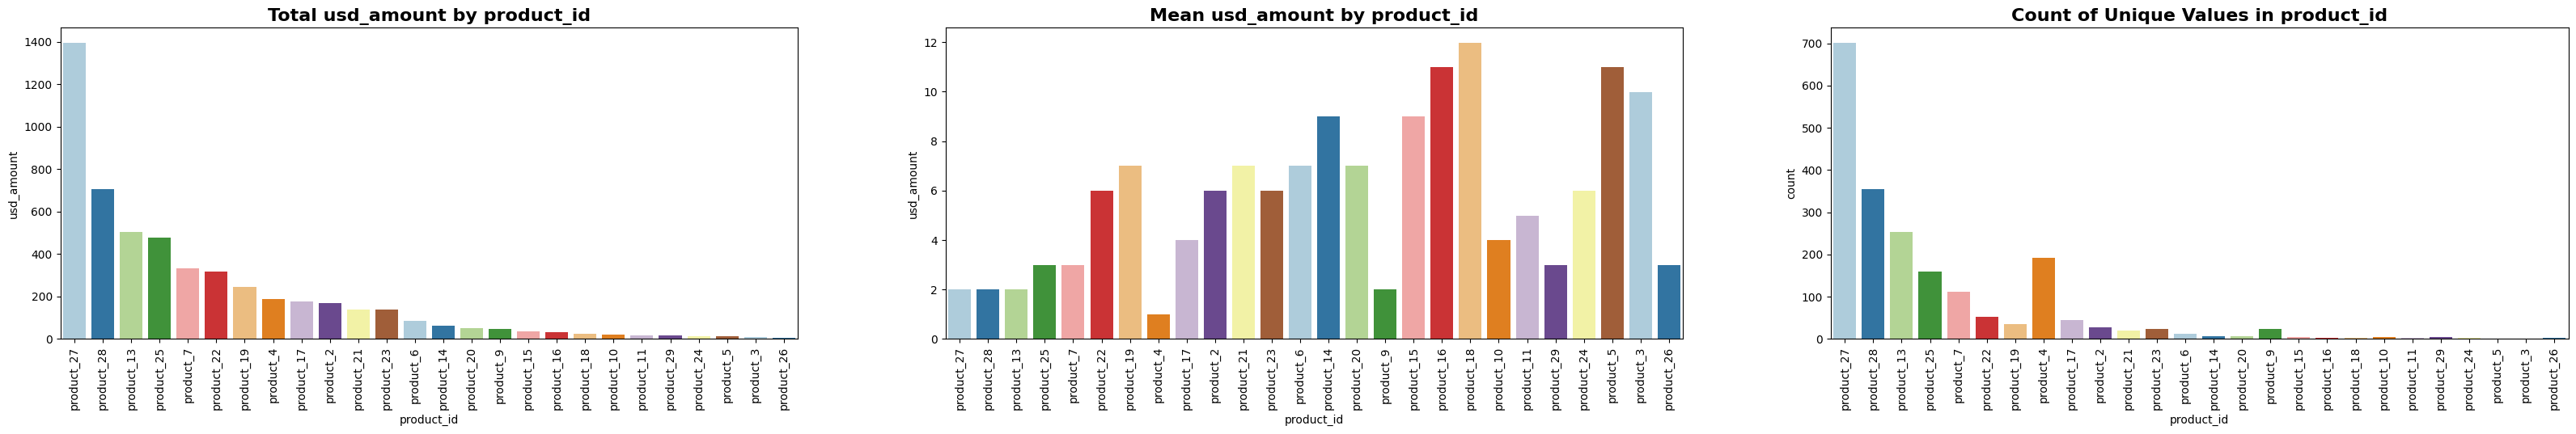

<ipython-input-38-57080bf8275d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, hue_order=sorted_index_str, order=sorted_index_str, palette=custom_palette, ax=axs[2], legend=False)


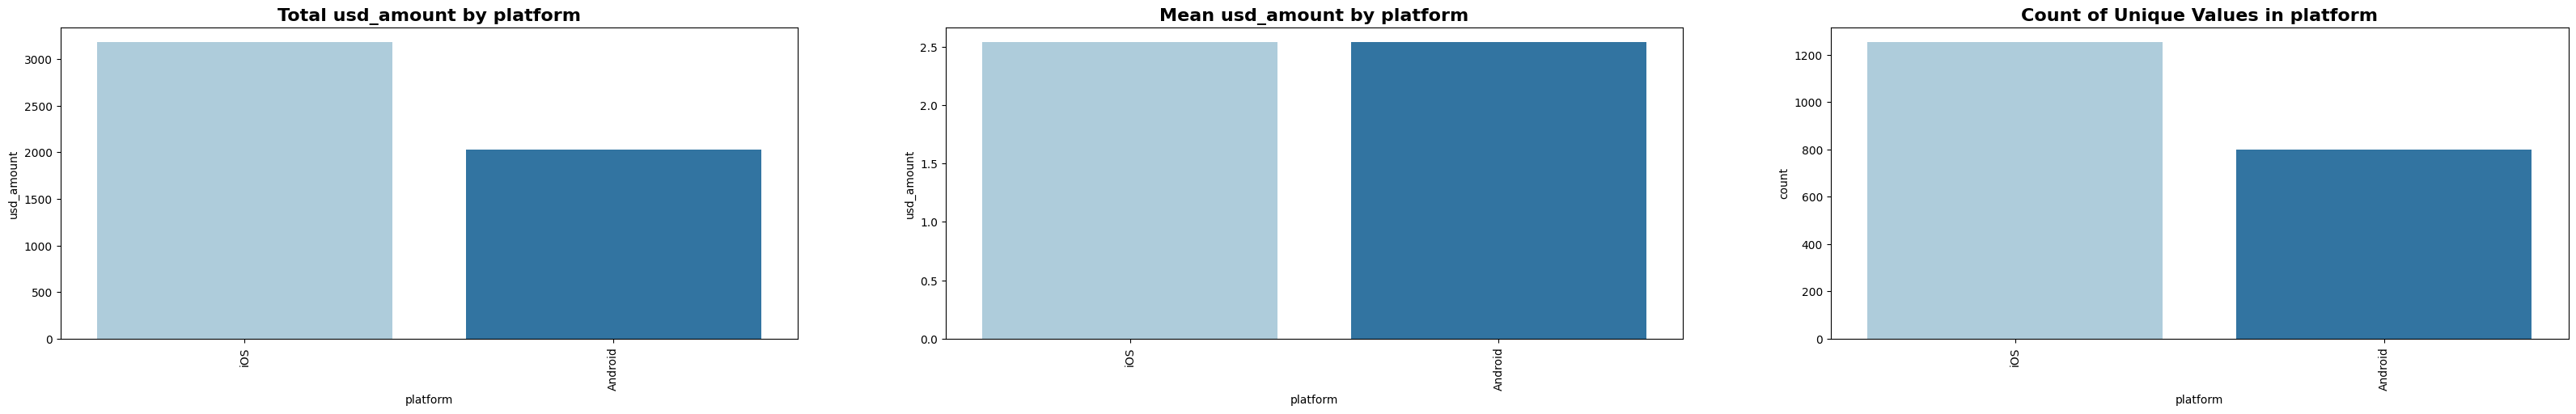

<ipython-input-38-57080bf8275d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, hue_order=sorted_index_str, order=sorted_index_str, palette=custom_palette, ax=axs[2], legend=False)


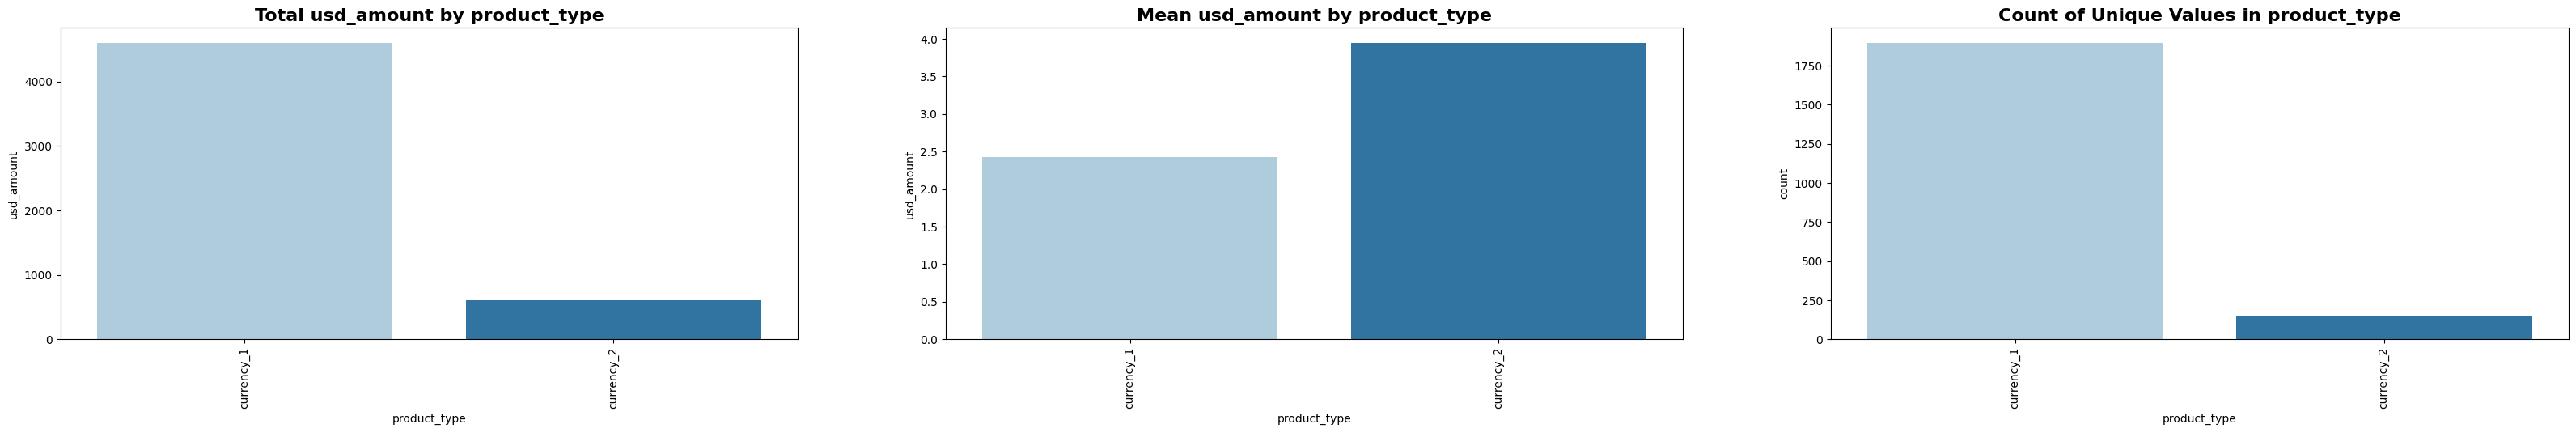

<ipython-input-38-57080bf8275d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, hue_order=sorted_index_str, order=sorted_index_str, palette=custom_palette, ax=axs[2], legend=False)


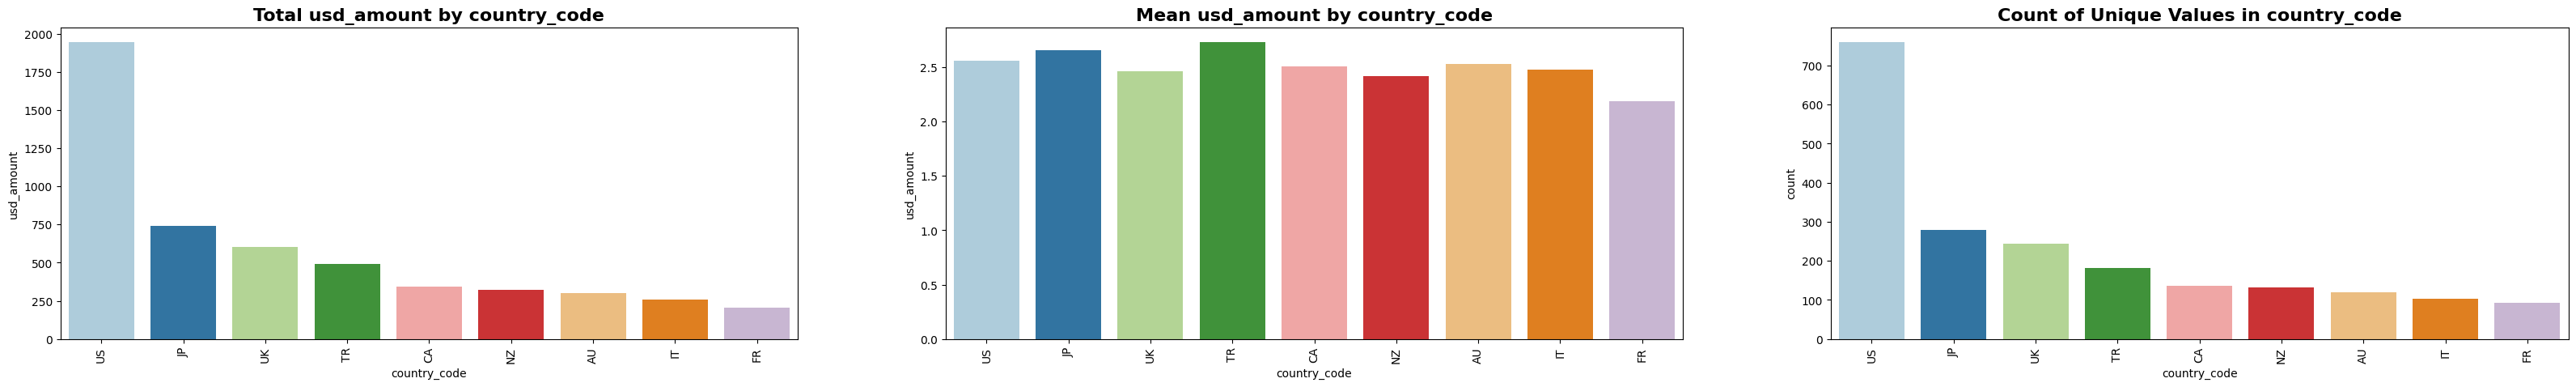

<ipython-input-38-57080bf8275d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, hue_order=sorted_index_str, order=sorted_index_str, palette=custom_palette, ax=axs[2], legend=False)


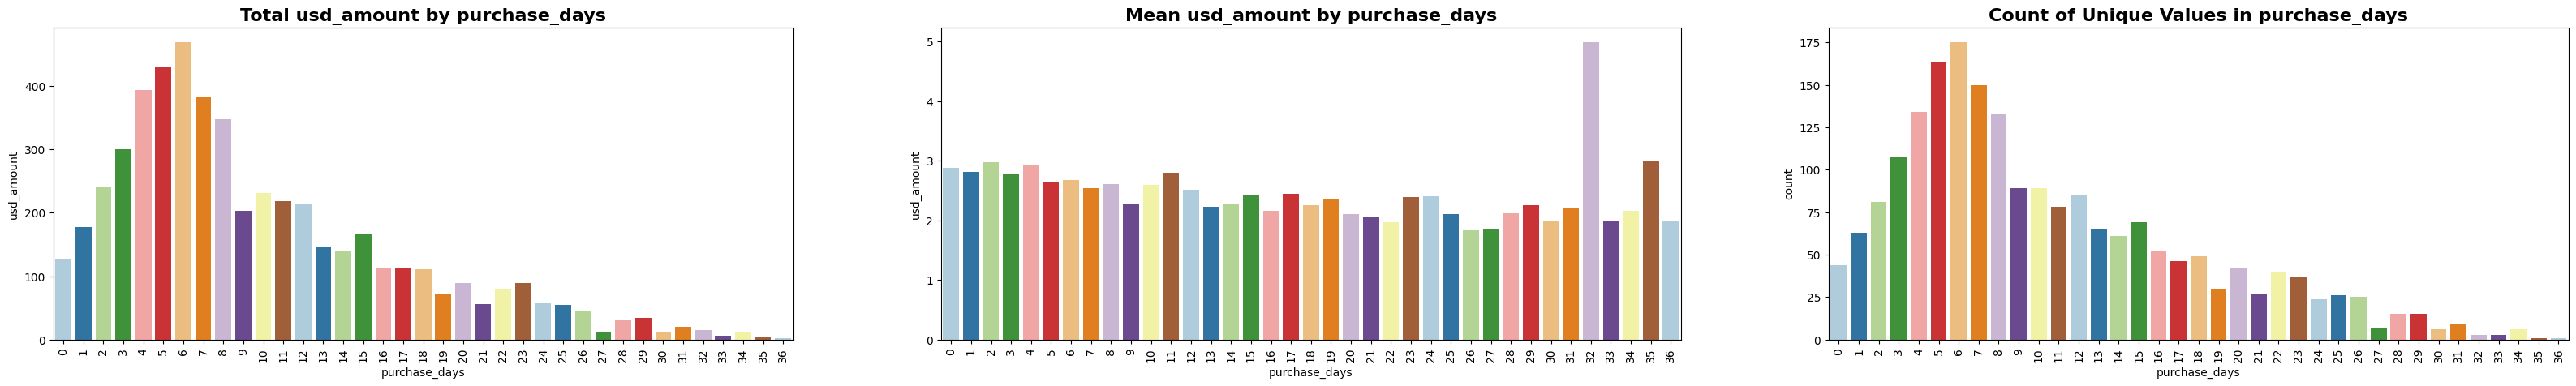

In [38]:
target_columns = ["product_id", "platform", "product_type",  "country_code", 'purchase_days']

# Color palette for better visualization on our graphs
color_palette = sns.color_palette("husl", len(target_columns))


for i, column in enumerate(target_columns):
    cs_mean, cs_sum = get_mean_sum(data, column, 'usd_amount')

    if column in ['offer_id', 'purchase_order', 'purchase_days']:
        sorted_index = cs_sum.sort_index(ascending=True).index
    else:
        sorted_index = cs_sum.sort_values(ascending=False).index

    if data[column].dtype in ['int64', 'float64']:
        sorted_index_str = sorted_index.astype(str)
    else:
        sorted_index_str = sorted_index

    # Create a figure with three subplots
    custom_palette = sns.color_palette("Paired", n_colors=len(sorted_index_str))

    fig, axs = plt.subplots(1, 3, figsize=(40, 5))

    # First subplot: Barplot for total usd_amount
    sns.barplot(x=sorted_index_str, y=cs_sum.reindex(sorted_index).values, hue=sorted_index_str, hue_order=sorted_index_str, palette=custom_palette, ax=axs[0], legend=False)
    axs[0].set_title(f'Total usd_amount by {column}', fontweight='bold', fontsize=16)
    axs[0].set_xlabel(column)
    axs[0].set_ylabel('usd_amount')
    axs[0].tick_params(axis='x', rotation=90)

    # Second subplot: Barplot for mean usd_amount
    sns.barplot(x=sorted_index_str, y=cs_mean.reindex(sorted_index).values, hue=sorted_index_str, palette=custom_palette, ax=axs[1], hue_order=sorted_index_str, legend=False)
    axs[1].set_title(f'Mean usd_amount by {column}', fontweight='bold', fontsize=16)
    axs[1].set_xlabel(column)
    axs[1].set_ylabel('usd_amount')
    axs[1].tick_params(axis='x', rotation=90)

    # Third subplot: Countplot for unique values
    sns.countplot(x=column, data=data, hue_order=sorted_index_str, order=sorted_index_str, palette=custom_palette, ax=axs[2], legend=False)
    axs[2].set_title(f'Count of Unique Values in {column}', fontweight='bold', fontsize=16)
    axs[2].tick_params(axis='x', rotation=90)

    # Show plots
    plt.show()
    print()


In [45]:
# Printing count & revenue contribution of top products, top countries and the first 10 days of users for more granular understanding.

product_group = data.groupby('product_id').agg(
    count_percentage=('product_id', lambda x: len(x) / len(data) * 100),
    revenue_contribution=('usd_amount', lambda x: sum(x) / data['usd_amount'].sum() * 100)
)

product_group = product_group.sort_values(by='revenue_contribution', ascending=False)


country_group = data.groupby('country_code').agg(
    count_percentage=('country_code', lambda x: len(x) / len(data) * 100),
    revenue_contribution=('usd_amount', lambda x: sum(x) / data['usd_amount'].sum() * 100)
)
country_group = country_group.sort_values(by='revenue_contribution', ascending=False)



days_group = data.groupby('purchase_days').agg(
    count_percentage=('purchase_days', lambda x: len(x) / len(data) * 100),
    revenue_contribution=('usd_amount', lambda x: sum(x) / data['usd_amount'].sum() * 100)
)
days_group = days_group.sort_index()

order_group = data.groupby('purchase_order').agg(
    count_percentage=('purchase_order', lambda x: len(x) / len(data) * 100),
    revenue_contribution=('usd_amount', lambda x: sum(x) / data['usd_amount'].sum() * 100)
)
order_group = order_group.sort_index()

# Printing results
print("Top Products:")
print(product_group.head(10))
print("Top Countries:")
print(country_group.head(10))
print("Purchase Days:")
print(days_group.head(10))

Top Products:
            count_percentage  revenue_contribution
product_id                                        
product_27             34.23                 26.82
product_28             17.26                 13.52
product_13             12.34                  9.66
product_25              7.75                  9.13
product_7               5.41                  6.37
product_22              2.58                  6.09
product_19              1.71                  4.70
product_4               9.31                  3.63
product_17              2.15                  3.37
product_2               1.37                  3.22
Top Countries:
              count_percentage  revenue_contribution
country_code                                        
US                       37.06                 37.32
JP                       13.60                 14.23
UK                       11.95                 11.57
TR                        8.82                  9.49
CA                        6.68           

Observe changes in preferred price points from the 1st to 4th purchase to understand evolving purchasing behavior.

In [52]:
# Filter for purchase_order 1 to 4 and calculate mean usd_amount
avg_amount_per_order = data_dev[data_dev['purchase_order'].isin([1, 2, 3, 4])] \
    .groupby('purchase_order')['usd_amount'] \
    .mean()

# Create a new DataFrame to print
new_df = pd.DataFrame([avg_amount_per_order.values], columns=avg_amount_per_order.index.astype(str))

# Print
print(new_df)

purchase_order    1    2    3    4
0              2.54 3.01 3.01 3.30


#### Numerical Data Analysis

Examine distributions of numerical data.

0 rows dropped from usd_amount
 Data Distribution : usd_amount


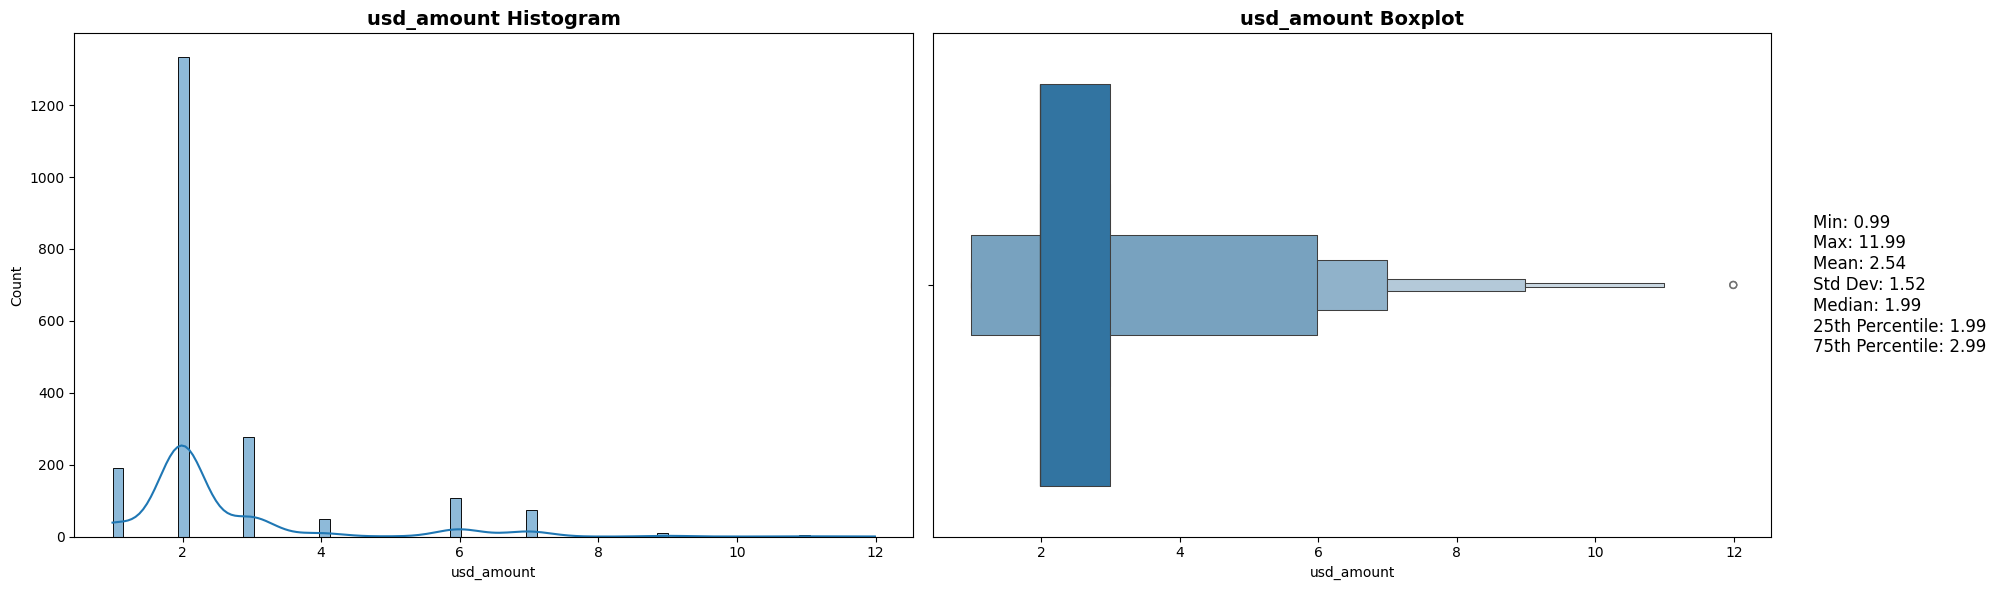



0 rows dropped from currency_1
 Data Distribution : currency_1


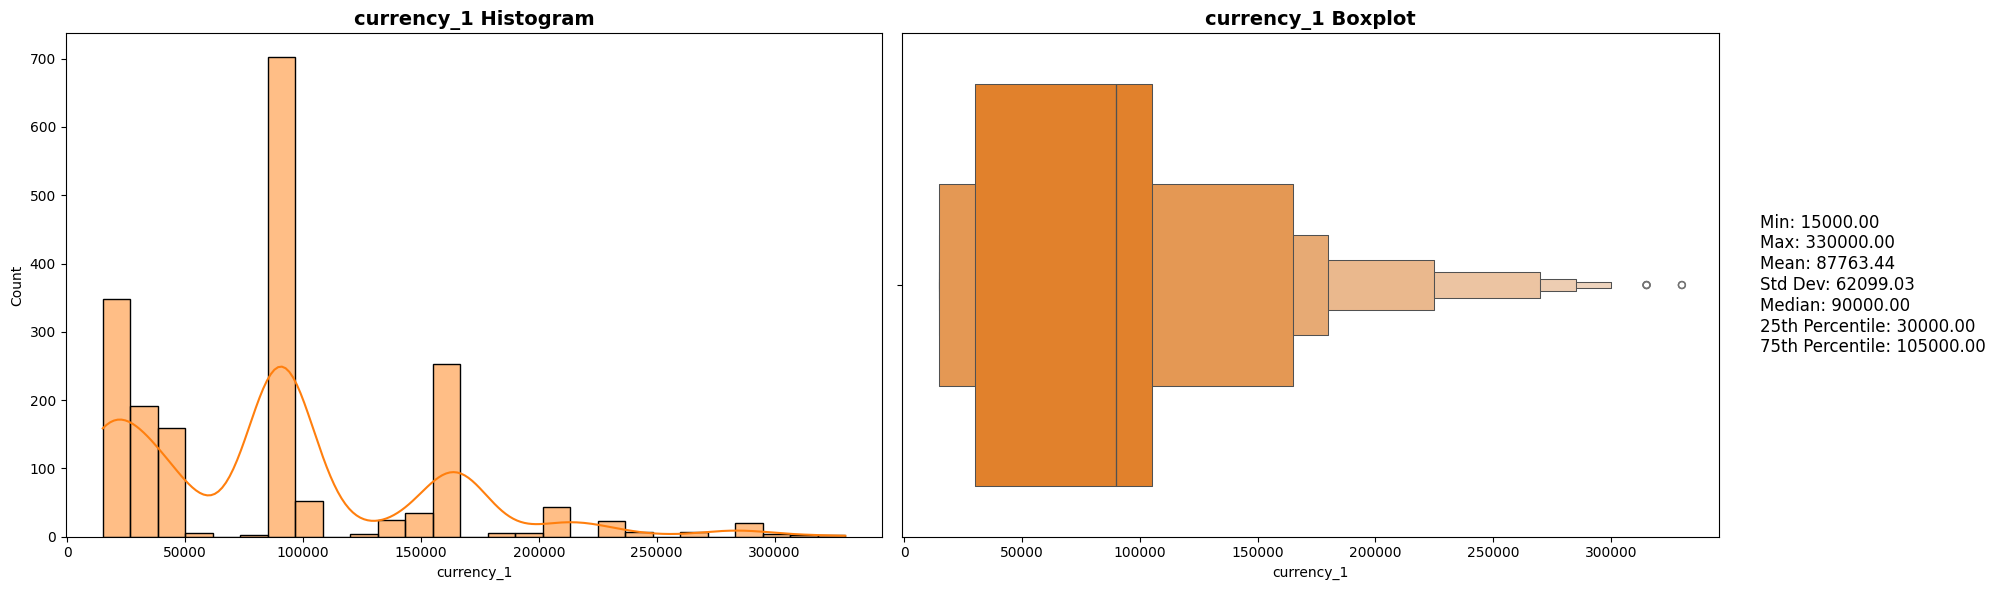



0 rows dropped from currency_1_prepurchase
 Data Distribution : currency_1_prepurchase


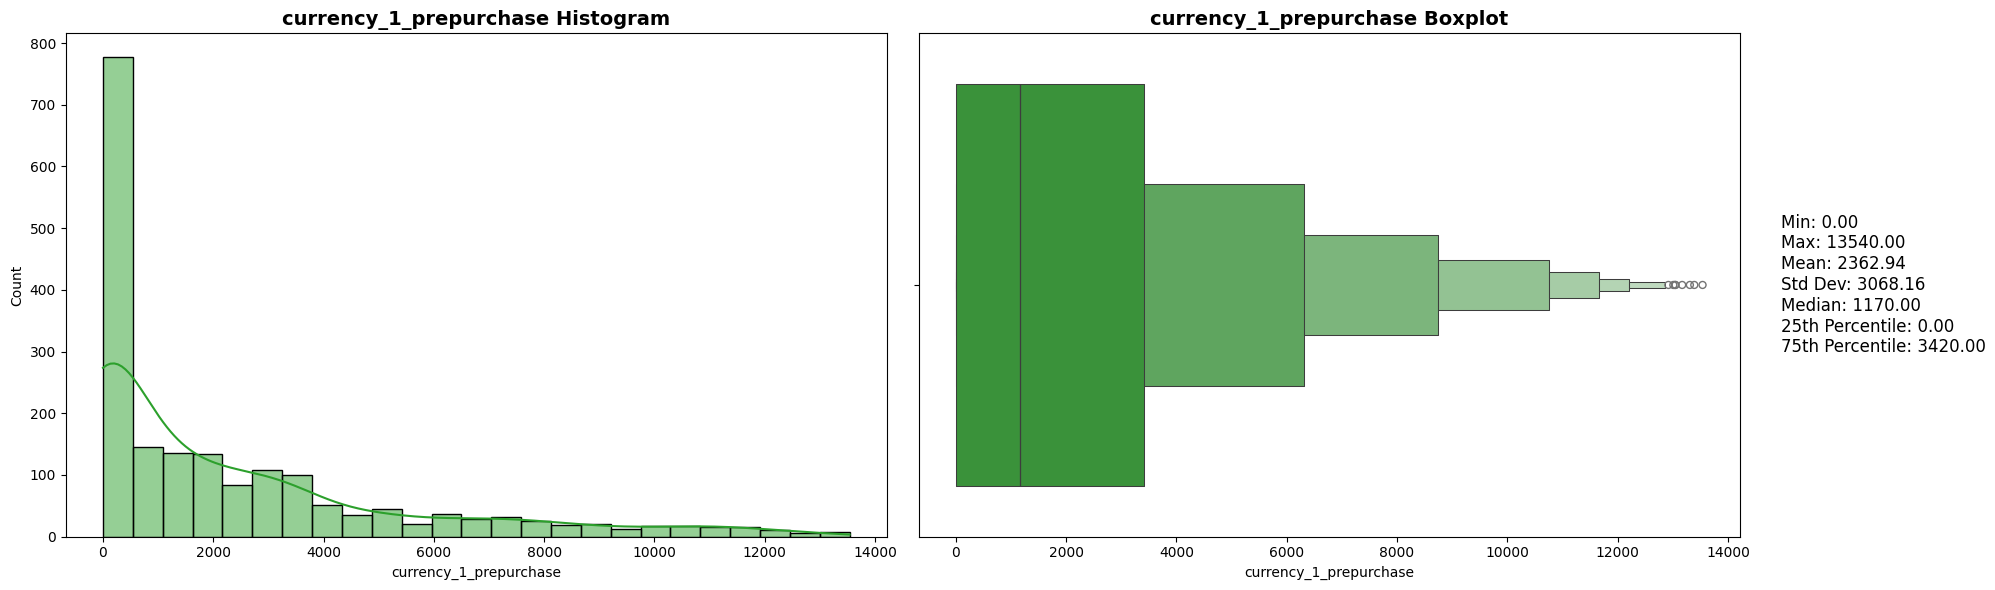



0 rows dropped from currency_2
 Data Distribution : currency_2


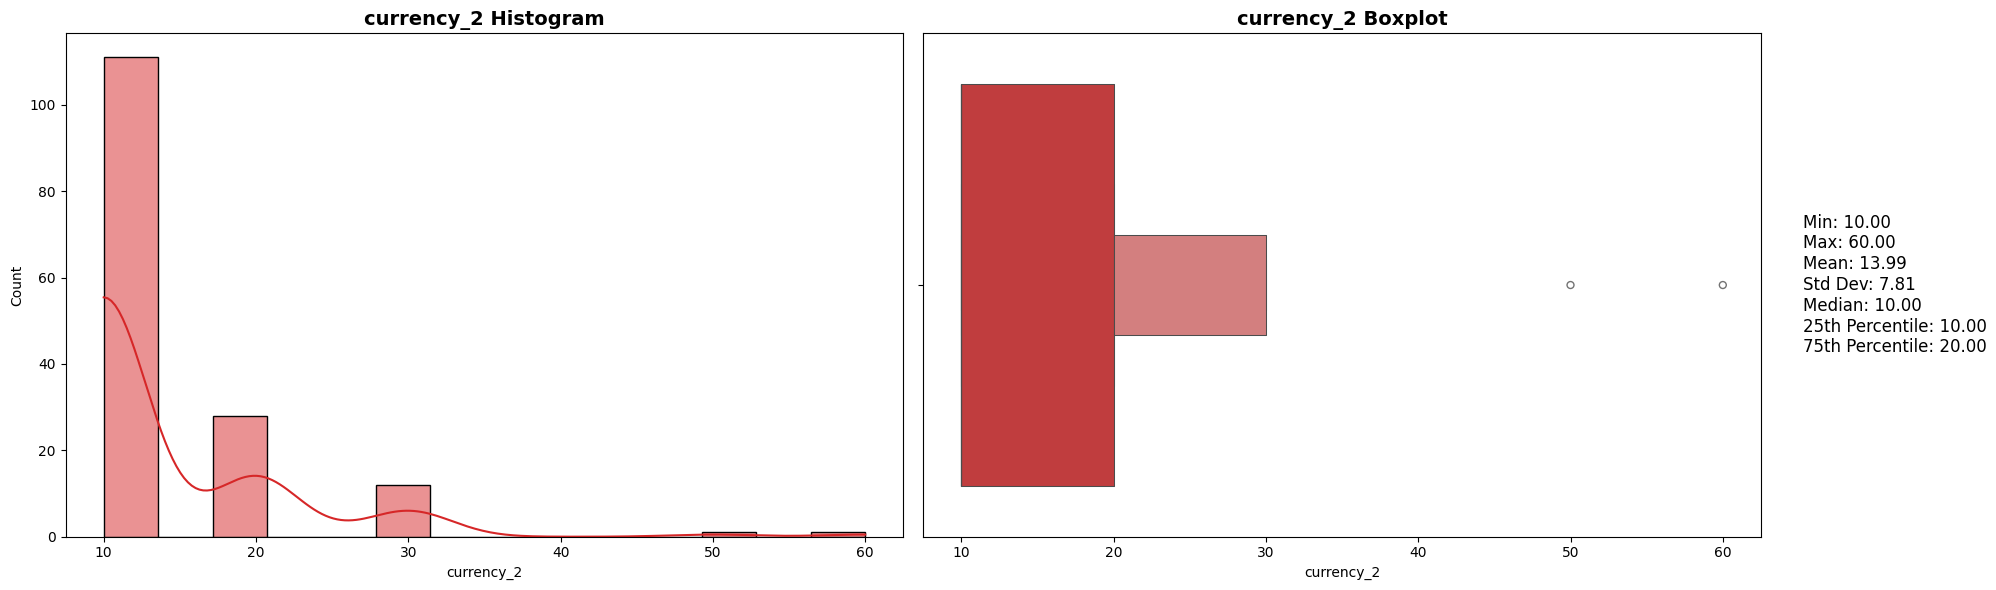



0 rows dropped from currency_2_prepurchase
 Data Distribution : currency_2_prepurchase


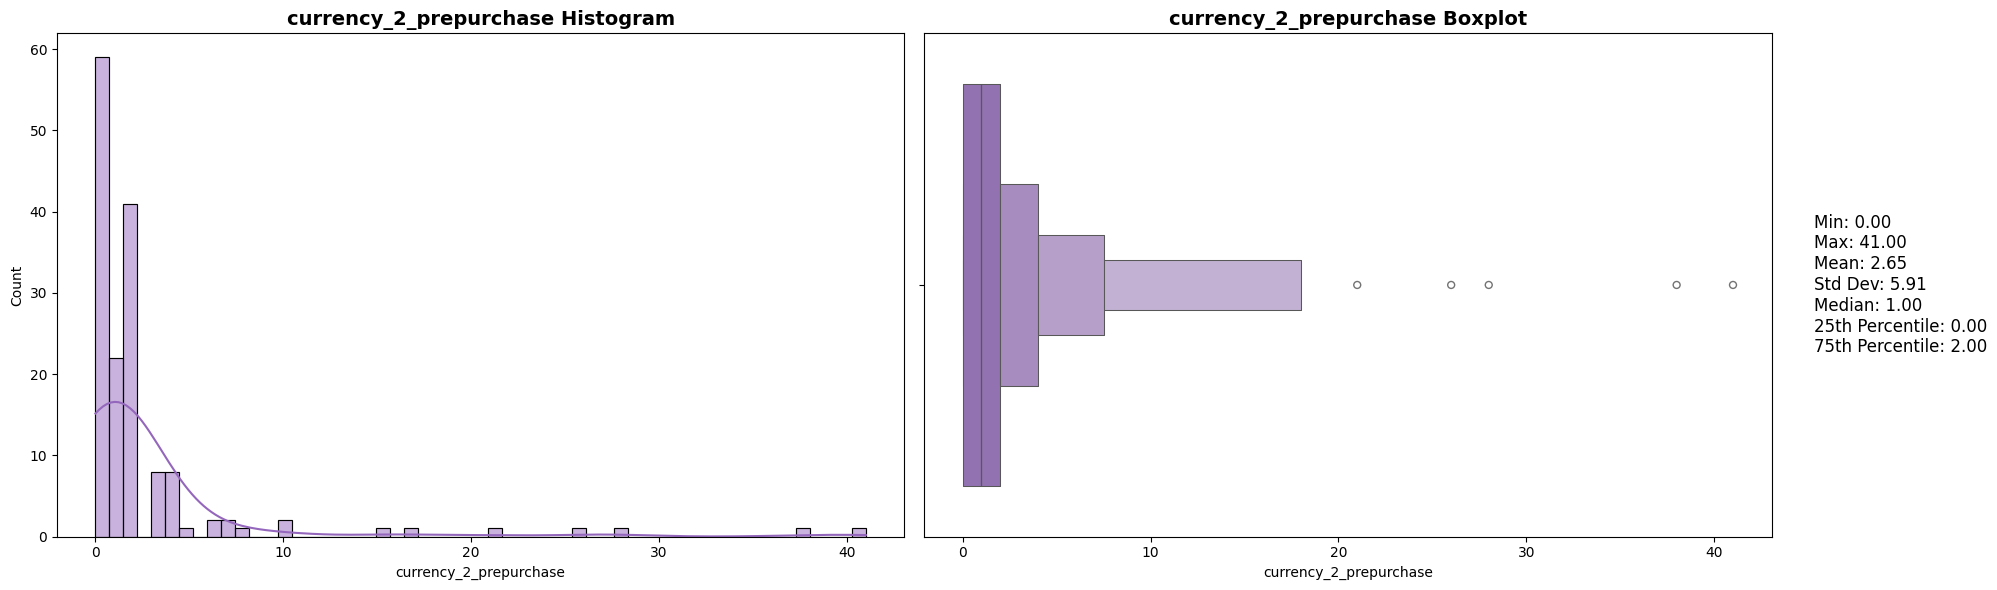

In [47]:
value_columns = ["usd_amount", "currency_1", "currency_1_prepurchase", "currency_2", "currency_2_prepurchase"]

# Define your color palettes
black_palette = ['#000000']
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Excluding zeros for different currencies.
for color, column in enumerate(value_columns):
    if column in ['currency_1', 'currency_1_prepurchase']:
        data_filtered = data[data['currency_1'] != 0]
    elif column in ['currency_2', 'currency_2_prepurchase']:
        data_filtered = data[data['currency_2'] != 0]
    else:
        data_filtered = data.copy()

    # Calculate mean and standard deviation
    mean = data_filtered[column].mean()
    std_dev = data_filtered[column].std()

    # Find values above 10 standard deviations from the mean to drop
    outliers = data_filtered[column] > (mean + 10 * std_dev)
    num_outliers = outliers.sum()

    data_filtered = data_filtered[~outliers]

    print(f'\033[93m\033[1m{num_outliers} rows dropped from {column}\033[0m')

    print(f'\033[93m\033[1m Data Distribution : {column}\033[0m')
    plt.figure(figsize=(20, 6))

    plt.subplot(1, 2, 1)
    plt.title(f'{column} Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_palette[0])
    sns.histplot(data_filtered[column], kde=True, color=color_palette[color])

    plt.subplot(1, 2, 2)
    plt.title(f'{column} Boxplot', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_palette[0])
    sns.boxenplot(data=data_filtered, x=column, color=color_palette[color])

    # Calculate statistics
    stats = data_filtered[column].describe()
    stats_text = (
        f"Min: {stats['min']:.2f}\n"
        f"Max: {stats['max']:.2f}\n"
        f"Mean: {stats['mean']:.2f}\n"
        f"Std Dev: {std_dev:.2f}\n"
        f"Median: {stats['50%']:.2f}\n"
        f"25th Percentile: {stats['25%']:.2f}\n"
        f"75th Percentile: {stats['75%']:.2f}"
    )

    plt.text(1.05, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='center')

    plt.tight_layout()
    plt.show()
    print('\n')

In [59]:
data = data_dev[data_dev['product_id'].isin(['product_13', 'product_25', 'product_27', 'product_28'])].copy()
data.sample(10)

,uid,currency_1,currency_1_prepurchase,currency_2,currency_2_prepurchase,product_id,usd_amount,platform,product_type,transaction_date,install_date,country_code,purchase_order,purchase_days
3696,1749,15000,1860,0,0,product_28,1.99,iOS,currency_1,2023-05-20,2023-05-06,US,3,14
5573,1092,165000,3740,0,0,product_13,1.99,iOS,currency_1,2023-05-10,2023-05-02,UK,1,8
1036,647,15000,0,0,0,product_28,1.99,Android,currency_1,2023-05-24,2023-05-05,TR,2,19
244,939,45000,0,0,0,product_25,2.99,iOS,currency_1,2023-05-15,2023-05-03,UK,2,12
13,1024,90000,3680,0,0,product_27,1.99,Android,currency_1,2023-05-10,2023-05-03,JP,1,7
3425,1833,90000,0,0,0,product_27,1.99,Android,currency_1,2023-05-15,2023-05-03,JP,19,12
3998,1636,45000,0,0,0,product_25,2.99,iOS,currency_1,2023-05-12,2023-05-04,CA,2,8
2501,141,165000,0,0,0,product_13,1.99,iOS,currency_1,2023-05-22,2023-05-06,IT,1,16
4046,1622,165000,2570,0,0,product_13,1.99,iOS,currency_1,2023-05-13,2023-05-03,IT,1,10
774,752,90000,730,0,0,product_27,1.99,iOS,currency_1,2023-05-15,2023-05-01,US,1,14


### Findings and Action Points:

**Insights:**

* Top revenue contributors are Product 13, 25, 27, and 28 with price points at 1.99 and 2.99 usd.
* Players typically make their first purchase on day 6, showing a right-skewed distribution.
* The US emerges as the leading market.
* A higher number of iOS users convert to purchasers, likely reflecting the iOS&Android market shares in the US.
* Currency_1 is the primary sales driver, vastly outperforming Currency_2 in both sales count and total revenue.


**Action Points:**

* Initiate an A/B test with a redesigned store page to evaluate effectiveness.
* Implement a price decoy strategy, highlighting the 2.99 and 3.99 usd packages to boost first-purchase spending.
* Introduce time-limited offers within the first 6 days to accelerate conversions.
* Conduct a detailed analysis of the long-term impacts of these changes to assess sustainability and overall effectiveness.